# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 7 - Distribuciones Power Law

In [2]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
from scipy import stats

### Distribuciones Power Law

#### 2.1 Dadas las redes de la figura, ¿cuál de ellas presenta una propiedad scale-free?

In [3]:
# La red de la derecha, ya que una propiedad scale-free, significa que aunque hay algunos nodos muy conectados entre sí,
# el grado de conexión de casi todos los nodos es bajo.

#### 2.2 De los siguientes mecanismos ¿cuál de ellos podría generar propiedad scale-free con más probabilidad?

In [4]:
# Un usuario crea una página web y añade un enlace a la página que le proporciona el primer resultado de una búsqueda en Google.
# Ya que si nos conectamos al primer resultado que nos proporciona, muchos nos vamos a conectar a ese resultado,
# sin embargo, no nos estamos conectado con el resto de nodos más pequeños.

### Estudio de la distribución de grado de una red

#### 3.1 Estadísticas

In [5]:
G = nx.read_gexf("internet_routers-22july06-2.gexf")

n_nodos = G.number_of_nodes()
n_enlaces  = G.number_of_edges()
grados_nodos = []
gradoMedio = 0
gradoMaximo = 0

for nodo in G.nodes():
    gradoMedio += G.degree(nodo)
    grados_nodos.append(G.degree(nodo))
    
print("El número de nodos son: " +str(n_nodos))
print("El número de enlaces son: "+str(n_enlaces))
print("El grado medio es: " +str(sum(grados_nodos)/n_nodos))
print("El grado máximo es: " + str(max(grados_nodos)))
print("El grado mínimo es: " + str(min(grados_nodos)))

El número de nodos son: 22963
El número de enlaces son: 48436
El grado medio es: 4.218612550624918
El grado máximo es: 2390
El grado mínimo es: 1


#### 3.2 Histograma

(array([2.2928e+04, 1.8000e+01, 9.0000e+00, 2.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 2.3990e+02, 4.7880e+02, 7.1770e+02, 9.5660e+02,
        1.1955e+03, 1.4344e+03, 1.6733e+03, 1.9122e+03, 2.1511e+03,
        2.3900e+03]),
 <a list of 10 Patch objects>)

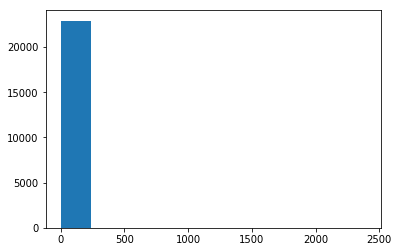

In [6]:
plt.hist(grados_nodos)

(array([   0., 7840., 9700., 2219.,  907.,  471.,  290.,  200.,  305.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

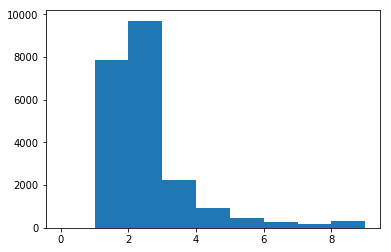

In [5]:
plt.hist(grados_nodos, range(10))

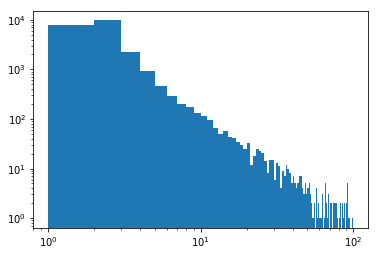

In [6]:
# Primer histograma logarítmico
plt.hist(grados_nodos, range(100))
plt.xscale("log")
plt.yscale("log")

#### Histograma con clase variable logaritmica

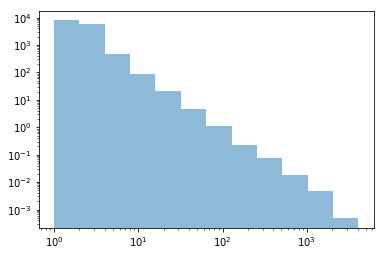

In [7]:
# Segundo histrograma logarítmico
clases = np.array([2**x for x in range(0,13)])
rango = clases[1:]-clases[:-1]
histograma, bin_enlaces =np.histogram(np.array(grados_nodos),bins=clases)
histograma=histograma/rango
plt.bar(bin_enlaces[:-1],histograma,width=rango, alpha=0.5,align='edge')
plt.yscale('log');
plt.xscale('log');

#### Estimación parámetro de power law

In [18]:
pendiente, intercept, correlacion, pvalor, error = stats.linregress(np.log(bin_enlaces[0:-1]),np.log(histograma))
print("Pendiente: " + str(pendiente))
print("El P-Valor: " + str(pvalor))
print("Coeficiente de correlación: "+ str(correlacion))

Pendiente: -2.1720245477465547
El P-Valor: 7.5782428799821e-13
Coeficiente de correlación: -0.9975052621651795


#### Estimación mediante distribución acumulada

In [19]:
grados_ordenados = list(sorted(grados_nodos, reverse=True))
ranking = list(np.arange(1,len(grados_ordenados)+1))
r = np.array(ranking)/len(grados_ordenados)
pendiente, intercept, correlacion, pvalor, error = stats.linregress(np.log(grados_ordenados),np.log(r))
print("Pendiente: " + str(pendiente-1))
print("El P-Valor: " + str(pvalor))
print("Coeficiente de correlación: "+ str(correlacion))

Pendiente: -2.2643462481003125
El P-Valor: 0.0
Coeficiente de correlación: -0.9674446000659406
